<a href="https://colab.research.google.com/github/AisAthania/Titanic_Data/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession 
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [3]:
from google.colab import files
files.upload()

Saving test.csv to test.csv


{'test.csv': b'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r\n893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r\n894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r\n895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r\n896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r\n897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r\n898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r\n899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r\n900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r\n901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r\n902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r\n903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r\n904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S\r\n905,2,"Howard, Mr. Benja

In [4]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\r\

In [5]:
from itertools import chain
from pyspark.sql.functions import count, mean, when, lit, create_map, regexp_extract

In [6]:
df1 = spark.read.csv('train.csv',header=True, inferSchema=True)
df2 = spark.read.csv('test.csv',header=True, inferSchema=True)

In [7]:
df1.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [8]:
df2.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [9]:
df1.limit(5).toPandas()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


In [10]:
df1.select('Survived', 'Pclass', 'Age', 'Fare').summary().show()

+-------+-------------------+------------------+------------------+-----------------+
|summary|           Survived|            Pclass|               Age|             Fare|
+-------+-------------------+------------------+------------------+-----------------+
|  count|                891|               891|               714|              891|
|   mean| 0.3838383838383838| 2.308641975308642| 29.69911764705882| 32.2042079685746|
| stddev|0.48659245426485753|0.8360712409770491|14.526497332334035|49.69342859718089|
|    min|                  0|                 1|              0.42|              0.0|
|    25%|                  0|                 2|              20.0|           7.8958|
|    50%|                  0|                 3|              28.0|          14.4542|
|    75%|                  1|                 3|              38.0|             31.0|
|    max|                  1|                 3|              80.0|         512.3292|
+-------+-------------------+------------------+------

In [11]:
print('Number of rows: \t', df1.count())
print('Number of columns: \t', len(df1.columns))
print('Number of rows: \t', df2.count())
print('Number of columns: \t', len(df2.columns))

Number of rows: 	 891
Number of columns: 	 12
Number of rows: 	 418
Number of columns: 	 11


In [12]:
for col in df1.columns:
    print(col.ljust(20), df1.filter(df1[col].isNull()).count())

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin                687
Embarked             2


In [13]:
df1.select('Fare', 'Embarked').summary('mean', '50%', 'max').show()

+-------+----------------+--------+
|summary|            Fare|Embarked|
+-------+----------------+--------+
|   mean|32.2042079685746|    null|
|    50%|         14.4542|    null|
|    max|        512.3292|       S|
+-------+----------------+--------+



In [14]:
df1 = df1.fillna({'Embarked': 'S', 'Fare':14.45})

In [15]:
df1 = df1.withColumn('Title', regexp_extract(df1['Name'],\
                '([A-Za-z]+)\.', 1))

df1.groupBy('Title').agg(count('Age'), mean('Age')).sort('count(Age)').show()

+--------+----------+------------------+
|   Title|count(Age)|          avg(Age)|
+--------+----------+------------------+
|Countess|         1|              33.0|
|     Don|         1|              40.0|
|    Lady|         1|              48.0|
|     Sir|         1|              49.0|
|Jonkheer|         1|              38.0|
|     Mme|         1|              24.0|
|      Ms|         1|              28.0|
|    Capt|         1|              70.0|
|    Mlle|         2|              24.0|
|   Major|         2|              48.5|
|     Col|         2|              58.0|
|     Rev|         6|43.166666666666664|
|      Dr|         6|              42.0|
|  Master|        36| 4.574166666666667|
|     Mrs|       108|35.898148148148145|
|    Miss|       146|21.773972602739725|
|      Mr|       398|32.368090452261306|
+--------+----------+------------------+



In [16]:
title_dic = {'Mr':'Mr', 'Miss':'Miss', 'Mrs':'Mrs', 'Master':'Master', \
             'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',\
             'Don': 'Mr', 'Mme': 'Miss', 'Jonkheer': 'Mr', 'Lady': 'Mrs',\
             'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs', \
             'Dr':'Mr', 'Rev':'Mr'}

mapping = create_map([lit(x) for x in chain(*title_dic.items())])

df1 = df1.withColumn('Title', mapping[df1['Title']])
df1.groupBy('Title').mean('Age').show()

+------+------------------+
| Title|          avg(Age)|
+------+------------------+
|  Miss|             21.86|
|Master| 4.574166666666667|
|    Mr| 33.02272727272727|
|   Mrs|35.981818181818184|
+------+------------------+



In [17]:
def age_imputer(df, title, age):
    
    
    return df.withColumn('Age', when((df['Age'].isNull()) & (df['Title']==title),age).otherwise(df['Age']))

In [18]:
df1 = age_imputer(df1, 'Mr', 33.02)
df1 = age_imputer(df1, 'Mrs', 35.98)
df1 = age_imputer(df1, 'Miss', 21.86)
df1 = age_imputer(df1, 'Master', 4.75)

In [19]:
df1 = df1.withColumn('FamilySize', df1['Parch'] + df1['SibSp']).drop('Parch', 'SibSp')

In [20]:
df1 = df1.drop('PassengerID', 'Cabin', 'Name', 'Ticket', 'Title')

In [21]:
df1.show(4)

+--------+------+------+----+-------+--------+----------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|FamilySize|
+--------+------+------+----+-------+--------+----------+
|       0|     3|  male|22.0|   7.25|       S|         1|
|       1|     1|female|38.0|71.2833|       C|         1|
|       1|     3|female|26.0|  7.925|       S|         0|
|       1|     1|female|35.0|   53.1|       S|         1|
+--------+------+------+----+-------+--------+----------+
only showing top 4 rows



In [22]:
for col in df1.columns:
    print(col.ljust(20), df1.filter(df1[col].isNull()).count())

Survived             0
Pclass               0
Sex                  0
Age                  0
Fare                 0
Embarked             0
FamilySize           0


In [23]:
# EDA

In [24]:
df1.groupBy('Survived').pivot('Pclass').count().show()

+--------+---+---+---+
|Survived|  1|  2|  3|
+--------+---+---+---+
|       1|136| 87|119|
|       0| 80| 97|372|
+--------+---+---+---+



In [25]:
df1.groupBy('Survived').pivot('Sex').count().show()

+--------+------+----+
|Survived|female|male|
+--------+------+----+
|       1|   233| 109|
|       0|    81| 468|
+--------+------+----+



In [26]:
pdf_train = df1.toPandas()
pdf_train.T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
Age,22.0,38.0,26.0,35.0,35.0,33.02,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,21.86,26.0,32.0
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75
Embarked,S,C,S,S,S,Q,S,S,S,C,...,S,S,S,S,Q,S,S,S,C,Q
FamilySize,1,1,0,1,0,0,0,4,2,1,...,0,0,0,0,5,0,0,3,0,0


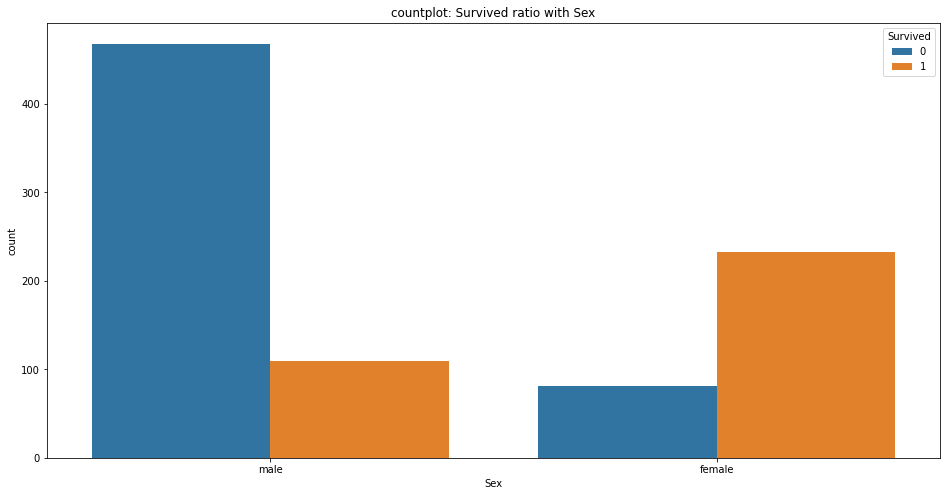

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, figsize=(16,8))
ax.set_title('countplot: Survived ratio with Sex')
sns.countplot(x=pdf_train['Sex'],hue= pdf_train['Survived'],ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


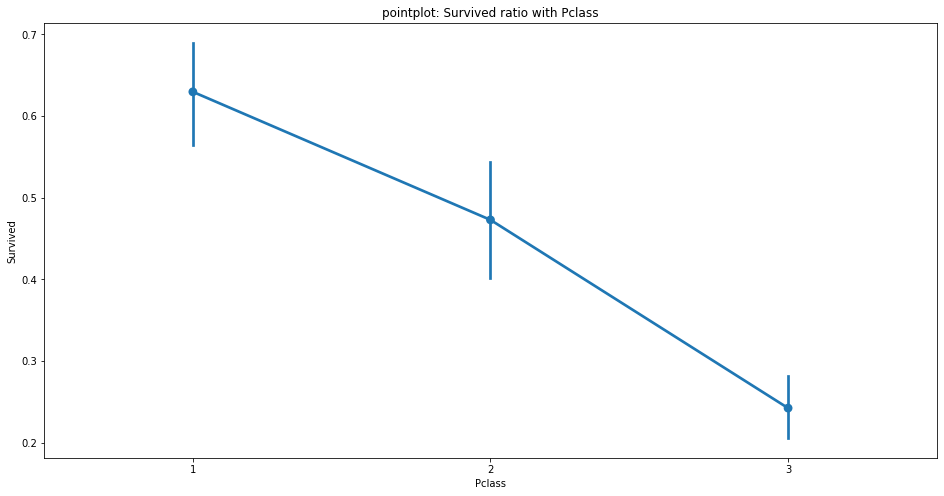

In [30]:
fig, ax = plt.subplots(1, figsize=(16,8))
ax.set_title('pointplot: Survived ratio with Pclass')
sns.pointplot(pdf_train['Pclass'],pdf_train['Survived'],ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


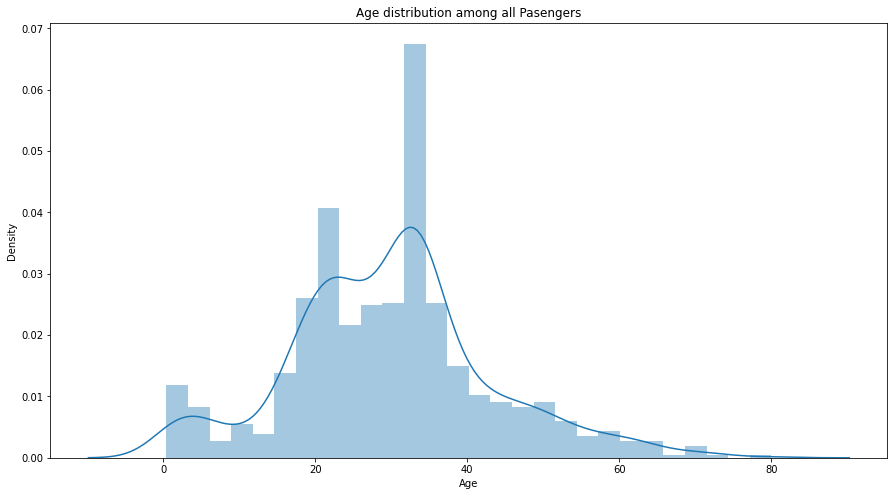

In [31]:
plt.figure(figsize=(15,8))
plt.title('Age distribution among all Pasengers')
sns.distplot(pdf_train['Age'])

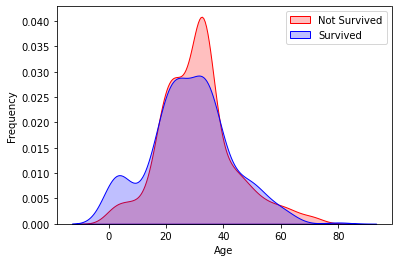

In [32]:
k = sns.kdeplot(pdf_train['Age']
                [(pdf_train['Survived']==0) 
                                     & (pdf_train['Age'].notnull())],
                color='Red',shade=True)
k = sns.kdeplot(pdf_train['Age']
                [(pdf_train['Survived']==1)  
                                     & (pdf_train['Age'].notnull())],
                color='Blue',shade=True)
k.set_xlabel('Age')
k.set_ylabel('Frequency')
k = k.legend(['Not Survived','Survived'])

In [33]:
from pyspark.sql import SparkSession

#Create PySpark DataFrame from Pandas
sparkDF=spark.createDataFrame(pdf_train) 
sparkDF.printSchema()
sparkDF.show()

root
 |-- Survived: long (nullable = true)
 |-- Pclass: long (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- FamilySize: long (nullable = true)

+--------+------+------+-----+-------+--------+----------+
|Survived|Pclass|   Sex|  Age|   Fare|Embarked|FamilySize|
+--------+------+------+-----+-------+--------+----------+
|       0|     3|  male| 22.0|   7.25|       S|         1|
|       1|     1|female| 38.0|71.2833|       C|         1|
|       1|     3|female| 26.0|  7.925|       S|         0|
|       1|     1|female| 35.0|   53.1|       S|         1|
|       0|     3|  male| 35.0|   8.05|       S|         0|
|       0|     3|  male|33.02| 8.4583|       Q|         0|
|       0|     1|  male| 54.0|51.8625|       S|         0|
|       0|     3|  male|  2.0| 21.075|       S|         4|
|       1|     3|female| 27.0|11.1333|       S|         2|
|       1|     2|female| 1

In [34]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression,\
                    RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [35]:
stringIndex = StringIndexer(inputCols=['Sex', 'Embarked'], 
                       outputCols=['SexNum', 'EmbNum'])

stringIndex_model = stringIndex.fit(sparkDF)

df1_ = stringIndex_model.transform(sparkDF).drop('Sex', 'Embarked')
df1_.show(4)

+--------+------+----+-------+----------+------+------+
|Survived|Pclass| Age|   Fare|FamilySize|SexNum|EmbNum|
+--------+------+----+-------+----------+------+------+
|       0|     3|22.0|   7.25|         1|   0.0|   0.0|
|       1|     1|38.0|71.2833|         1|   1.0|   1.0|
|       1|     3|26.0|  7.925|         0|   1.0|   0.0|
|       1|     1|35.0|   53.1|         1|   1.0|   0.0|
+--------+------+----+-------+----------+------+------+
only showing top 4 rows



In [36]:
vec_asmbl = VectorAssembler(inputCols=df1_.columns[1:], 
                           outputCol='features')

df1_ = vec_asmbl.transform(df1_).select('features', 'Survived')
df1_.show(4, truncate=False)

+------------------------------+--------+
|features                      |Survived|
+------------------------------+--------+
|[3.0,22.0,7.25,1.0,0.0,0.0]   |0       |
|[1.0,38.0,71.2833,1.0,1.0,1.0]|1       |
|[3.0,26.0,7.925,0.0,1.0,0.0]  |1       |
|[1.0,35.0,53.1,1.0,1.0,0.0]   |1       |
+------------------------------+--------+
only showing top 4 rows



In [50]:
train_df, test_data = df1_.randomSplit([0.7, 0.3])

In [38]:
train_df.show(4, truncate=False)

+---------------------+--------+
|features             |Survived|
+---------------------+--------+
|(6,[0,1],[1.0,40.0]) |0       |
|(6,[0,1],[2.0,33.02])|0       |
|(6,[0,1],[2.0,33.02])|0       |
|(6,[0,1],[3.0,25.0]) |1       |
+---------------------+--------+
only showing top 4 rows



In [39]:
evaluator = MulticlassClassificationEvaluator(labelCol='Survived', 
                                          metricName='accuracy')

In [40]:
ridge = LogisticRegression(labelCol='Survived', 
                        maxIter=100, 
                        elasticNetParam=0, # Ridge regression is choosen 
                        regParam=0.03)

model = ridge.fit(train_df)
pred = model.transform(test_data)
evaluator.evaluate(pred)

0.8057553956834532

In [41]:
lasso = LogisticRegression(labelCol='Survived', 
                           maxIter=100,
                           elasticNetParam=1, # Lasso
                           regParam=0.0003)

model = lasso.fit(train_df)
pred = model.transform(test_data)
evaluator.evaluate(pred)

0.7913669064748201

In [42]:
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.regression import LinearRegression

from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt


#standadize the data 

scaler = StandardScaler(
    inputCol = 'features',
    outputCol = 'scaledFeatures',
    withMean = True,
    withStd = True,
).fit(df1_)

#when we transform the dataset feature will still remain in it
df_scaled = scaler.transform(df1_)
df_scaled.show(10)

+--------------------+--------+--------------------+
|            features|Survived|      scaledFeatures|
+--------------------+--------+--------------------+
|[3.0,22.0,7.25,1....|       0|[0.82691281652437...|
|[1.0,38.0,71.2833...|       1|[-1.5652278312782...|
|[3.0,26.0,7.925,0...|       1|[0.82691281652437...|
|[1.0,35.0,53.1,1....|       1|[-1.5652278312782...|
|[3.0,35.0,8.05,0....|       0|[0.82691281652437...|
|[3.0,33.02,8.4583...|       0|[0.82691281652437...|
|[1.0,54.0,51.8625...|       0|[-1.5652278312782...|
|[3.0,2.0,21.075,4...|       0|[0.82691281652437...|
|[3.0,27.0,11.1333...|       1|[0.82691281652437...|
|[2.0,14.0,30.0708...|       1|[-0.3691575073769...|
+--------------------+--------+--------------------+
only showing top 10 rows



In [43]:
#fit PCA model
n_components = 2
pca = PCA(
    k= n_components,
    inputCol = 'scaledFeatures',
    outputCol = 'pcaFeatures'
).fit(df_scaled)

df_pca = pca.transform(df_scaled)
print("explained variance ratio", pca.explainedVariance.toArray())
df_pca.show(10)

explained variance ratio [0.28747071 0.24570127]
+--------------------+--------+--------------------+--------------------+
|            features|Survived|      scaledFeatures|         pcaFeatures|
+--------------------+--------+--------------------+--------------------+
|[3.0,22.0,7.25,1....|       0|[0.82691281652437...|[-1.2510999702322...|
|[1.0,38.0,71.2833...|       1|[-1.5652278312782...|[2.10472971046743...|
|[3.0,26.0,7.925,0...|       1|[0.82691281652437...|[-0.6660510026341...|
|[1.0,35.0,53.1,1....|       1|[-1.5652278312782...|[1.74325079011823...|
|[3.0,35.0,8.05,0....|       0|[0.82691281652437...|[-0.9733629557534...|
|[3.0,33.02,8.4583...|       0|[0.82691281652437...|[-0.8948191500313...|
|[1.0,54.0,51.8625...|       0|[-1.5652278312782...|[1.61472951597472...|
|[3.0,2.0,21.075,4...|       0|[0.82691281652437...|[-1.4257314296629...|
|[3.0,27.0,11.1333...|       1|[0.82691281652437...|[-0.5159519876819...|
|[2.0,14.0,30.0708...|       1|[-0.3691575073769...|[0.22069845

In [44]:
#collect data in Numpy Array
x_pca = df_pca.rdd.map(lambda row: row.pcaFeatures).collect()
x_pca = np.array(x_pca)

In [45]:
x_pca

array([[-1.25109997,  0.02790897],
       [ 2.10472971,  0.28665553],
       [-0.666051  ,  0.42988584],
       ...,
       [-0.44041456,  1.8431733 ],
       [ 0.73037976, -0.71288778],
       [-0.92812078, -0.59193294]])

In [46]:
#convert array to dataframe 
df_pca = pd.DataFrame(x_pca, columns= ['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,-1.251100,0.027909
1,2.104730,0.286656
2,-0.666051,0.429886
3,1.743251,0.245786
4,-0.973363,-0.918188


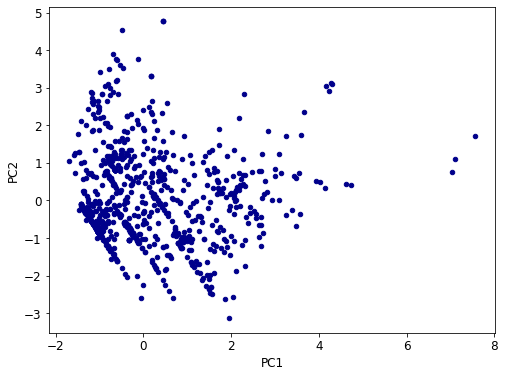

In [47]:
#plot two principal components 
plt.rcParams['figure.figsize'] = 8,6
plt.rcParams['font.size']= 12
ax1 = df_pca.plot.scatter(x='PC1', y='PC2', c='DarkBlue')

In [48]:
#linear regression using Pyspark
df1_.show()

+--------------------+--------+
|            features|Survived|
+--------------------+--------+
|[3.0,22.0,7.25,1....|       0|
|[1.0,38.0,71.2833...|       1|
|[3.0,26.0,7.925,0...|       1|
|[1.0,35.0,53.1,1....|       1|
|[3.0,35.0,8.05,0....|       0|
|[3.0,33.02,8.4583...|       0|
|[1.0,54.0,51.8625...|       0|
|[3.0,2.0,21.075,4...|       0|
|[3.0,27.0,11.1333...|       1|
|[2.0,14.0,30.0708...|       1|
|[3.0,4.0,16.7,2.0...|       1|
|[1.0,58.0,26.55,0...|       1|
|[3.0,20.0,8.05,0....|       0|
|[3.0,39.0,31.275,...|       0|
|[3.0,14.0,7.8542,...|       0|
|[2.0,55.0,16.0,0....|       1|
|[3.0,2.0,29.125,5...|       0|
|[2.0,33.02,13.0,0...|       1|
|[3.0,31.0,18.0,1....|       0|
|[3.0,35.98,7.225,...|       1|
+--------------------+--------+
only showing top 20 rows



In [52]:
train_df, test_data = df1_.randomSplit([0.7, 0.3])

In [53]:
#train model
regressor = LinearRegression(featuresCol= 'features', labelCol= 'Survived')

regressor = regressor.fit(train_df)

In [54]:
#print model cooeff and intercept
coeff = regressor.coefficients

intr = regressor.intercept

print("The coeeficient of the model is : %a" %coeff)
print("The intercept of the model is : %a" %intr)

The coeeficient of the model is : DenseVector([-0.1812, -0.0061, 0.0003, -0.0358, 0.4698, 0.0485])
The intercept of the model is : 0.8269410720063167


In [55]:
#evaluate the model
pred = regressor.evaluate(test_data)
#predict the model
pred.predictions.show()

+--------------------+--------+-------------------+
|            features|Survived|         prediction|
+--------------------+--------+-------------------+
|(6,[0,1],[2.0,33....|       0|  0.262093364530121|
|(6,[0,1],[3.0,19.0])|       0|0.16690268535753428|
|(6,[0,1],[3.0,25.0])|       1| 0.1301061230452819|
|(6,[0,1],[3.0,36.0])|       0|0.06264575880615242|
|[1.0,17.0,108.9,1...|       1| 1.0598763959500461|
|[1.0,18.0,262.375...|       1| 0.9968873822992284|
|[1.0,21.0,77.2875...|       0| 0.5066370718747166|
|[1.0,22.0,66.6,1....|       1| 0.9667689500967116|
|[1.0,24.0,79.2,0....|       0| 0.5731828786793807|
|[1.0,24.0,263.0,5...|       1| 0.8759826898613982|
|[1.0,28.0,47.1,0....|       0| 0.4895684966278413|
|[1.0,30.0,86.5,0....|       1|  0.960068516167395|
|[1.0,31.0,164.866...|       1| 0.9081414737214168|
|[1.0,33.02,26.0,0...|       0|0.45183082360242743|
|[1.0,33.02,30.5,0...|       1|0.45331331040378914|
|[1.0,35.0,83.475,...|       1| 0.8926023905919376|
|[1.0,35.98,

In [56]:
#calaculate the model stats
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol = "Survived", predictionCol="prediction", metricName = "rmse")

In [57]:
# root mean square
rmse = eval.evaluate(pred.predictions)
print("Rmse",rmse)

# mean square error
mse = eval.evaluate(pred.predictions, {eval.metricName : "mse"})
print("mse",mse)

#Mean absolute error
mae = eval.evaluate(pred.predictions, {eval.metricName : "mae"})
print("mae",mae)

#r2
r2 = eval.evaluate(pred.predictions, {eval.metricName : "r2"})
print("R2",r2)

Rmse 0.3576433320748157
mse 0.1279087529775769
mae 0.281807615378809
R2 0.4430648787188459
